In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data=boston.data

In [6]:
data.shape

(506, 13)

In [7]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
target = boston.target

In [9]:
feature_names = boston.feature_names

In [10]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
X = pd.DataFrame(data, columns=feature_names)

In [13]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
X.shape
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [15]:
y = pd.DataFrame(target, columns=['price'])

In [16]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [17]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_pred = lr.predict(X_test)

In [24]:
check_test = pd.DataFrame({'y_test': y_test['price'],
                          'y_pred': y_pred.flatten()},
                         columns=['y_test', 'y_pred'])

In [25]:
check_test.head(10)

,y_test,y_pred
173,23.6,28.838854
274,32.4,36.007833
491,13.6,15.083248
72,22.8,25.230909
452,16.1,18.878641
76,20.0,23.213983
316,17.8,17.593112
140,14.0,14.305081
471,19.6,23.054390
500,16.8,20.620083


In [26]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

In [27]:
check_test.head()

,y_test,y_pred,error
173,23.6,28.838854,5.238854
274,32.4,36.007833,3.607833
491,13.6,15.083248,1.483248
72,22.8,25.230909,2.430909
452,16.1,18.878641,2.778641


In [28]:
initial_mse = (check_test['error'] ** 2).mean()
initial_mse

22.098694827098043

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

22.098694827098036

In [31]:
(np.abs(check_test['error'])).mean()

3.060939595437035

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mean_absolute_error(y_test, y_pred)

3.060939595437034

In [34]:
from sklearn.metrics import r2_score

In [35]:
r2_score(y_test, y_pred)

0.6844267283527123

In [36]:
lr.intercept_

array([29.83642016])

In [37]:
lr.coef_

array([[-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,
         2.77350326e+00, -1.62388292e+01,  4.36875476e+00,
        -9.24808158e-03, -1.40086668e+00,  2.57761243e-01,
        -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]])

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'Var')

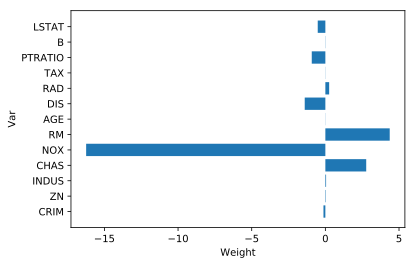

In [40]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Weight')
plt.ylabel('Var')

In [41]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.468655,11.596306,11.119974,0.076517,0.558326,6.323496,69.147230,3.763440,9.361478,405.311346,18.263852,358.767124,12.513298
std,8.313983,23.093394,6.953401,0.266175,0.119118,0.720086,27.703149,2.112633,8.601322,166.060463,2.263954,87.511867,7.147690
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081930,0.000000,5.130000,0.000000,0.453000,5.890000,46.250000,2.075400,4.000000,279.000000,16.600000,376.140000,6.865000
50%,0.269380,0.000000,9.690000,0.000000,0.538000,6.226000,78.100000,3.112100,5.000000,330.000000,18.600000,391.340000,11.220000
75%,3.242325,20.000000,18.100000,0.000000,0.639000,6.664500,93.850000,5.250950,16.000000,666.000000,20.200000,395.760000,16.395000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train)

In [45]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [46]:
X_test_scaled = scaler.transform(X_test)

In [47]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [48]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Var')

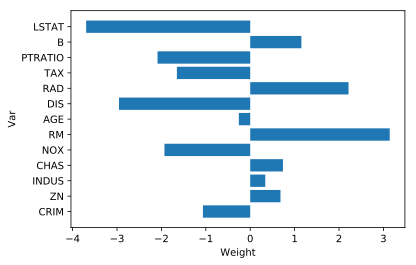

In [49]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Weight')
plt.ylabel('Var')

In [50]:
feats = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [51]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats], y_train)
    y_pred = model.predict(X_test.loc[:, feats])
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [52]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, LinearRegression())

21.79024941647527

In [53]:
from sklearn.linear_model import Lasso, Ridge

In [54]:
model = Lasso(alpha=0.003)

In [55]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

21.81140873202922

In [56]:
model = Ridge(alpha=0.001)

In [57]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

21.790278352569842

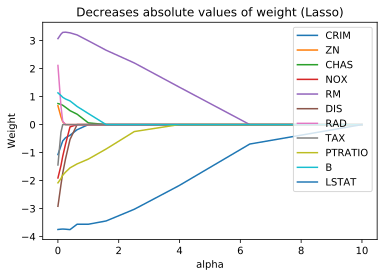

In [58]:
n = 21
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 1, n)
for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha=val)
    lasso.fit(X_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = lasso.coef_.flatten()
    
for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Decreases absolute values of weight (Lasso)')
plt.xlabel('alpha')
plt.ylabel('Weight')
plt.legend(feats)

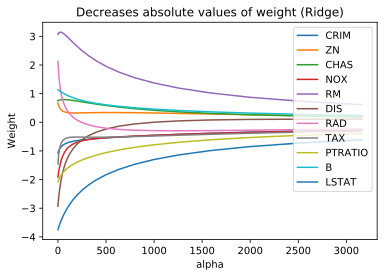

In [59]:
n = 66
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 3.5, n)
for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val)
    ridge.fit(X_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = ridge.coef_.flatten()
    
for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Decreases absolute values of weight (Ridge)')
plt.xlabel('alpha')
plt.ylabel('Weight')
plt.legend(feats)

In [60]:
data = pd.read_csv('input/train.csv')

In [61]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
data.set_index('PassengerId')
target = 'Survived'

In [63]:
y = data[target]
x = data.drop(target, axis=1)

In [64]:
x = x.drop(['Cabin', 'Name', 'Ticket'], axis=1)
mean_age = x['Age'].mean()
mean_age

29.69911764705882

In [65]:
x['Age'] = x['Age'].fillna(mean_age)

In [66]:
x['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [67]:
x['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [68]:
embarked_mode = x['Embarked'].mode()[0]

In [69]:
x['Embarked'] = x['Embarked'].fillna(embarked_mode)

In [70]:
x['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [71]:
x['Sex'] = (x['Sex'] == 'female').astype(int)
x['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [72]:
x = pd.get_dummies(x)

In [73]:
x['Pclass'] = x['Pclass'].astype('category')
x = pd.get_dummies(x)

In [74]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Pclass_1       891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
dtypes: float64(2), int64(4), uint8(6)
memory usage: 47.1 KB


In [75]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=42)

In [76]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 12 columns):
PassengerId    668 non-null int64
Sex            668 non-null int64
Age            668 non-null float64
SibSp          668 non-null int64
Parch          668 non-null int64
Fare           668 non-null float64
Embarked_C     668 non-null uint8
Embarked_Q     668 non-null uint8
Embarked_S     668 non-null uint8
Pclass_1       668 non-null uint8
Pclass_2       668 non-null uint8
Pclass_3       668 non-null uint8
dtypes: float64(2), int64(4), uint8(6)
memory usage: 40.4 KB


In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lr = LogisticRegression()

In [79]:
lr.fit(x_train, y_train)

/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [80]:
y_pred = lr.predict(x_valid)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(y_valid, y_pred)

0.7982062780269058

In [83]:
y_proba = lr.predict_proba(x_valid)

In [84]:
x_train.to_pickle('x_train.pkl')
y_train.to_pickle('y_train.pkl')
x_valid.to_pickle('x_valid.pkl')
y_valid.to_pickle('y_valid.pkl')

In [85]:
from sklearn.svm import SVC

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler()

In [88]:
x_train.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
298,299,0,29.699118,0,0,30.5000,0,0,1,1,0,0
884,885,0,25.000000,0,0,7.0500,0,0,1,0,0,1
247,248,1,24.000000,0,2,14.5000,0,0,1,0,1,0
478,479,0,22.000000,0,0,7.5208,0,0,1,0,0,1
305,306,0,0.920000,1,2,151.5500,0,0,1,1,0,0


In [89]:
x_train.describe()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,447.450599,0.342814,29.476233,0.553892,0.372754,32.179397,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,258.038366,0.475006,13.009962,1.185279,0.795588,51.604012,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,452.500000,0.000000,29.699118,0.000000,0.000000,14.400000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,673.500000,1.000000,35.000000,1.000000,0.000000,30.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [91]:
x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])

/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/jt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jt/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [92]:
x_train.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
298,299,0,0.367921,0.000,0.000000,0.059532,0,0,1,1,0,0
884,885,0,0.308872,0.000,0.000000,0.013761,0,0,1,0,0,1
247,248,1,0.296306,0.000,0.333333,0.028302,0,0,1,0,1,0
478,479,0,0.271174,0.000,0.000000,0.014680,0,0,1,0,0,1
305,306,0,0.006283,0.125,0.333333,0.295806,0,0,1,1,0,0


In [93]:
x_train.describe()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,447.450599,0.342814,0.365120,0.069237,0.062126,0.062810,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,258.038366,0.475006,0.163483,0.148160,0.132598,0.100724,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.750000,0.000000,0.271174,0.000000,0.000000,0.015469,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,452.500000,0.000000,0.367921,0.000000,0.000000,0.028107,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,673.500000,1.000000,0.434531,0.125000,0.000000,0.059532,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
x_valid[cols_for_scale] = scaler.transform(x_valid[cols_for_scale])

/Users/jt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jt/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [95]:
x_valid.describe()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,441.654709,0.381166,0.376310,0.053812,0.068012,0.063003,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,255.820359,0.486766,0.163162,0.100208,0.139652,0.085059,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,6.000000,0.000000,0.005152,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,234.000000,0.000000,0.283740,0.000000,0.000000,0.015412,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,427.000000,0.000000,0.367921,0.000000,0.000000,0.029758,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,656.000000,1.000000,0.447097,0.125000,0.166667,0.061155,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,890.000000,1.000000,0.886906,0.500000,0.833333,0.512122,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
from sklearn.externals import joblib

In [97]:
joblib.dump(scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']

In [98]:
scaler = joblib.load('min_max_scaler.pkl')

In [99]:
clf = SVC()

In [100]:
clf.fit(x_train, y_train)

/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [101]:
y_pred = clf.predict(x_valid)

In [102]:
y_pred_train = clf.predict(x_train)

In [103]:
accuracy_score(y_valid, y_pred)

0.6233183856502242

In [104]:
c_vals = np.logspace(-2, 5, 58)

In [105]:
accuracy_valid = []
accuracy_train = []

In [106]:
for val in c_vals:
    clf = SVC(C=val)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'C={val}\n\tacc_valid={acc_valid}\n\tacc_train={acc_train}')

/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base

C=0.01
	acc_valid=0.600896860986547
	acc_train=0.6212574850299402
C=0.013268047497147245
	acc_valid=0.600896860986547
	acc_train=0.6212574850299402
C=0.017604108438655525
	acc_valid=0.600896860986547
	acc_train=0.6212574850299402
C=0.023357214690901226
	acc_valid=0.600896860986547
	acc_train=0.6212574850299402
C=0.030990463391994284
	acc_valid=0.600896860986547
	acc_train=0.6212574850299402
C=0.04111829402435831
	acc_valid=0.600896860986547
	acc_train=0.6212574850299402
C=0.0545559478116852
	acc_valid=0.600896860986547
	acc_train=0.6212574850299402
C=0.07238509068173254
	acc_valid=0.600896860986547
	acc_train=0.6212574850299402


/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base

C=0.0960408821250538
	acc_valid=0.600896860986547
	acc_train=0.6212574850299402
C=0.12742749857031335
	acc_valid=0.600896860986547
	acc_train=0.6212574850299402
C=0.169071410347358
	acc_valid=0.600896860986547
	acc_train=0.6212574850299402
C=0.22432475028984192
	acc_valid=0.600896860986547
	acc_train=0.6212574850299402
C=0.29763514416313175
	acc_valid=0.600896860986547
	acc_train=0.624251497005988
C=0.39490372295766996
	acc_valid=0.600896860986547
	acc_train=0.6646706586826348
C=0.5239601353002644
	acc_valid=0.6053811659192825
	acc_train=0.7080838323353293
C=0.6951927961775606
	acc_valid=0.6098654708520179
	acc_train=0.7559880239520959


/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base

C=0.9223851039358476
	acc_valid=0.6233183856502242
	acc_train=0.7904191616766467
C=1.2238249369681924
	acc_valid=0.6367713004484304
	acc_train=0.8188622754491018
C=1.623776739188721
	acc_valid=0.6457399103139013
	acc_train=0.8517964071856288
C=2.154434690031882
	acc_valid=0.6591928251121076
	acc_train=0.8877245508982036
C=2.8585141796844713
	acc_valid=0.6502242152466368
	acc_train=0.9236526946107785
C=3.79269019073225
	acc_valid=0.6412556053811659
	acc_train=0.9491017964071856
C=5.032159359259993
	acc_valid=0.6367713004484304
	acc_train=0.9670658682634731


/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base

C=6.676692939187563
	acc_valid=0.6412556053811659
	acc_train=0.9760479041916168
C=8.858667904100823
	acc_valid=0.6322869955156951
	acc_train=0.9805389221556886
C=11.753722651306354
	acc_valid=0.6367713004484304
	acc_train=0.9835329341317365
C=15.594895040582816
	acc_valid=0.6322869955156951
	acc_train=0.9880239520958084
C=20.69138081114788
	acc_valid=0.6322869955156951
	acc_train=0.9910179640718563
C=27.453422338387142
	acc_valid=0.6278026905829597
	acc_train=0.9940119760479041
C=36.42533115449638
	acc_valid=0.6412556053811659
	acc_train=0.9985029940119761


/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base

C=48.32930238571752
	acc_valid=0.6367713004484304
	acc_train=1.0
C=64.12354795576917
	acc_valid=0.6367713004484304
	acc_train=1.0
C=85.07942799627445
	acc_valid=0.6367713004484304
	acc_train=1.0
C=112.88378916846884
	acc_valid=0.6367713004484304
	acc_train=1.0


/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base

C=149.77474763452
	acc_valid=0.6367713004484304
	acc_train=1.0
C=198.72184654880533
	acc_valid=0.6367713004484304
	acc_train=1.0
C=263.6650898730355
	acc_valid=0.6367713004484304
	acc_train=1.0
C=349.83209357750326
	acc_valid=0.6367713004484304
	acc_train=1.0
C=464.1588833612773
	acc_valid=0.6367713004484304
	acc_train=1.0
C=615.8482110660254
	acc_valid=0.6367713004484304
	acc_train=1.0


/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base

C=817.1103315457186
	acc_valid=0.6367713004484304
	acc_train=1.0
C=1084.145868935835
	acc_valid=0.6367713004484304
	acc_train=1.0
C=1438.449888287663
	acc_valid=0.6367713004484304
	acc_train=1.0
C=1908.542144006686
	acc_valid=0.6367713004484304
	acc_train=1.0
C=2532.2627816987947
	acc_valid=0.6367713004484304
	acc_train=1.0
C=3359.818286283781
	acc_valid=0.6367713004484304
	acc_train=1.0
C=4457.822860419707
	acc_valid=0.6367713004484304
	acc_train=1.0


/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base

C=5914.660544591746
	acc_valid=0.6367713004484304
	acc_train=1.0
C=7847.5997035146065
	acc_valid=0.6367713004484304
	acc_train=1.0
C=10412.232560483044
	acc_valid=0.6367713004484304
	acc_train=1.0
C=13814.99961638321
	acc_valid=0.6367713004484304
	acc_train=1.0
C=18329.807108324338
	acc_valid=0.6367713004484304
	acc_train=1.0
C=24320.07513267945
	acc_valid=0.6367713004484304
	acc_train=1.0


/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base

C=32267.99119945805
	acc_valid=0.6367713004484304
	acc_train=1.0
C=42813.32398719387
	acc_valid=0.6367713004484304
	acc_train=1.0
C=56804.92161728417
	acc_valid=0.6367713004484304
	acc_train=1.0
C=75369.03980898541
	acc_valid=0.6367713004484304
	acc_train=1.0
C=100000.0
	acc_valid=0.6367713004484304
	acc_train=1.0


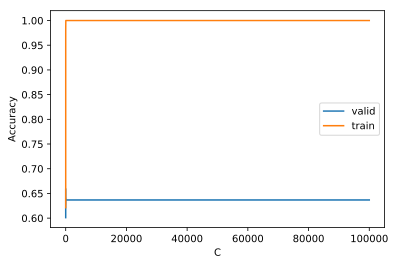

In [107]:
plt.plot(c_vals, accuracy_valid)
plt.plot(c_vals, accuracy_train)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['valid', 'train'])

In [108]:
accuracy_valid

[0.600896860986547,
 0.600896860986547,
 0.600896860986547,
 0.600896860986547,
 0.600896860986547,
 0.600896860986547,
 0.600896860986547,
 0.600896860986547,
 0.600896860986547,
 0.600896860986547,
 0.600896860986547,
 0.600896860986547,
 0.600896860986547,
 0.600896860986547,
 0.6053811659192825,
 0.6098654708520179,
 0.6233183856502242,
 0.6367713004484304,
 0.6457399103139013,
 0.6591928251121076,
 0.6502242152466368,
 0.6412556053811659,
 0.6367713004484304,
 0.6412556053811659,
 0.6322869955156951,
 0.6367713004484304,
 0.6322869955156951,
 0.6322869955156951,
 0.6278026905829597,
 0.6412556053811659,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.6367713004484304,
 0.636

In [109]:
accuracy_train

[0.6212574850299402,
 0.6212574850299402,
 0.6212574850299402,
 0.6212574850299402,
 0.6212574850299402,
 0.6212574850299402,
 0.6212574850299402,
 0.6212574850299402,
 0.6212574850299402,
 0.6212574850299402,
 0.6212574850299402,
 0.6212574850299402,
 0.624251497005988,
 0.6646706586826348,
 0.7080838323353293,
 0.7559880239520959,
 0.7904191616766467,
 0.8188622754491018,
 0.8517964071856288,
 0.8877245508982036,
 0.9236526946107785,
 0.9491017964071856,
 0.9670658682634731,
 0.9760479041916168,
 0.9805389221556886,
 0.9835329341317365,
 0.9880239520958084,
 0.9910179640718563,
 0.9940119760479041,
 0.9985029940119761,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]